# Data Analysis on Stack Overflow Annual Developer Survey 2024

## Introduction

In this project, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://survey.stackoverflow.co/2024.

In [1]:
import requests as re
import zipfile
import pandas as pd
import os
import warnings
warnings.simplefilter("ignore")

In [4]:
def download_and_unzip(url, zip_path, extract_dir):
    if not os.path.exists(zip_path):
        print(f"Downloading {zip_path}...")
        response = re.get(url)
        with open(zip_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {zip_path}.")
    else:
        print(f"{zip_path} already exists, skipping download.")
    
    if not os.path.exists(extract_dir):
        print(f"Unzipping {zip_path}...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Extracted to {extract_dir}.")
    else:
        print(f"Files already extracted to {extract_dir}, skipping unzip.")

url = "https://cdn.sanity.io/files/jo7n4k8s/production/262f04c41d99fea692e0125c342e446782233fe4.zip/stack-overflow-developer-survey-2024.zip"
zip_path = "dataset.zip"
extract_dir = "dataset"
download_and_unzip(url, zip_path, extract_dir)

dataset.zip already exists, skipping download.
Files already extracted to dataset, skipping unzip.


In [5]:
os.listdir('dataset')

['2024 Developer Survey.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

It seems like the dataset contains three files:

- `2024 Developer Survey` - The survey form.
- `survey_results_public.csv` - The full list of responses to the questions. 
- `survey_results_schema.csv` - The list of questions, shortcodes for each question, and meta-data of the questions.

In [2]:
schema_raw = pd.read_csv('dataset\survey_results_schema.csv')
schema_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   qid         87 non-null     object
 1   qname       87 non-null     object
 2   question    87 non-null     object
 3   force_resp  66 non-null     object
 4   type        87 non-null     object
 5   selector    87 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB


In [3]:
schema_raw[['force_resp', 'type', 'selector']].value_counts().reset_index()

,force_resp,type,selector,count
0,False,MC,SAVR,20
1,False,Matrix,Likert,16
2,False,MC,MAVR,14
3,True,MC,SAVR,6
4,False,MC,DL,2
5,True,MC,DL,2
6,True,MC,MAVR,2
7,False,CS,VRTL,1
8,False,MC,NPS,1
9,False,Slider,HSLIDER,1


We can see that the columns 'force_resp', 'type', and 'selector' decribe the kind of response expected from the respondants

- The majority of the questions are optional (False under `force_resp`), while a few are mandatory (True).
- Multiple Choice (MC) questions are the most common, using either single-answer or multi-answer formats.
- A variety of selectors are used, including dropdown lists, Likert scales, sliders, and vertical radios (VR) for answer input.


In [4]:
response_raw = pd.read_csv('dataset\survey_results_public.csv')

In [5]:
pd.set_option('display.max_columns', 120)
response_raw.info(max_cols=120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

In [6]:
response_raw.sample(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
2385,2386,I am a developer by profession,55-64 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,40,30,"Developer, full-stack","Just me - I am a freelancer, sole proprietor, ...",I have a great deal of influence,Start a free trial;Visit developer communities...,Is ready-to-go but also customizable for growt...,Quality support system;Reputation for quality ...,United States of America,USD\tUnited States dollar,80000.0,Delphi;HTML/CSS;PHP;SQL,Delphi;HTML/CSS;PHP;SQL,Delphi;HTML/CSS;PHP;SQL,Firebird;MariaDB;MySQL;Oracle;PostgreSQL,Firebird;MariaDB;MySQL;Oracle;PostgreSQL,Firebird;MariaDB;MySQL;Oracle;PostgreSQL,Oracle Cloud Infrastructure (OCI),Oracle Cloud Infrastructure (OCI),Oracle Cloud Infrastructure (OCI),jQuery,jQuery,jQuery,NaN,NaN,NaN,DirectX,DirectX,DirectX,MSBuild,MSBuild,MSBuild,Visual Studio Code,Visual Studio Code,Visual Studio Code,Ubuntu;Windows,Ubuntu;Windows,Jira,Jira,Jira,Discord,Discord,Discord,Bing AI;ChatGPT,Bing AI;ChatGPT,Bing AI;ChatGPT,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, definitely",Yes,Indifferent,Increase productivity;Greater efficiency,Somewhat distrust,Bad at handling complex tasks,Learning about a codebase;Writing code;Debuggi...,NaN,NaN,NaN,Learning about a codebase;Debugging and gettin...,Writing code;Search for answers;Generating con...,NaN,NaN,I'm not sure,Circulating misinformation or disinformation;I...,Don't trust the output or answers;Lack of prop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,80000.0,NaN
16612,16613,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other onl

The dataset contains over 65,437 responses to 113 questions (column names). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized response ID.

As we know that many questions are multiple choice and not mandatory to answer, there are a lot of NaN values and multi-valued columns. We can split such multi-valued columns later on when performing the analysis.

Also the response data is very categorical in nature.

There seems to be a lot more columns in the responses than the number of questions mentioned in the schema. Let see what are missing.

In [11]:
qnames_response = response_raw.columns
qnames_schema = schema_raw['qname'].unique()

matching_qnames = set(qnames_response).intersection(qnames_schema)
missing_in_schema = set(qnames_response).difference(qnames_schema)
missing_in_response = set(qnames_schema).difference(qnames_response)

print("Matching qnames: {}\n{}".format(len(matching_qnames), matching_qnames))
print("qnames in response table but missing in schema table: {}\n{}".format(len(missing_in_schema), missing_in_schema))
print("qnames in schema table but missing in response table: {}\n{}".format(len(missing_in_response), missing_in_response))

Matching qnames: 69
{'AIChallenges', 'EdLevel', 'AISelect', 'Country', 'SurveyLength', 'SOComm', 'Knowledge_8', 'SOPartFreq', 'JobSatPoints_5', 'LearnCodeOnline', 'AIThreat', 'TechDoc', 'Knowledge_3', 'Currency', 'JobSatPoints_4', 'Employment', 'LearnCode', 'YearsCode', 'NEWSOSites', 'WorkExp', 'TimeAnswering', 'JobSatPoints_10', 'Knowledge_7', 'JobSatPoints_1', 'AIBen', 'JobSatPoints_9', 'Age', 'Knowledge_1', 'Knowledge_2', 'Frequency_2', 'YearsCodePro', 'BuildvsBuy', 'AIEthics', 'TBranch', 'SOAccount', 'ProfessionalCloud', 'Frequency_1', 'Frequency_3', 'CompTotal', 'ICorPM', 'JobSat', 'TimeSearching', 'AISent', 'SOVisitFreq', 'MainBranch', 'Knowledge_4', 'Check', 'OrgSize', 'Knowledge_9', 'JobSatPoints_8', 'BuyNewTool', 'JobSatPoints_6', 'JobSatPoints_11', 'ProfessionalTech', 'AIAcc', 'Industry', 'DevType', 'Knowledge_6', 'JobSatPoints_7', 'SurveyEase', 'SOHow', 'TechEndorse', 'RemoteWork', 'CodingActivities', 'AIComplex', 'Frustration', 'Knowledge_5', 'PurchaseInfluence', 'Professio

We will deal with the above problem in the data preprocessing & cleaning step in our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions
- View held on AI

Let's select a subset of columns with the relevant data for our analysis.

In [6]:
selected_columns = [
    # Demographics
    'Age','Country','EdLevel','CodingActivities','Employment','WorkExp','Industry', 
    # Distribution of skills and preferences
    'LanguageHaveWorkedWith','LanguageWantToWorkWith','LanguageAdmired','TimeSearching','TimeAnswering', 
    # Employment
    'RemoteWork','DevType','ProfessionalTech','ProfessionalCloud','ProfessionalQuestion', 
    # AI
    'AISelect','AISent','AIBen','AIAcc','AIComplex','AIThreat',
    'AIEthics','AIChallenges', 
    # Miscellaneous
    'SurveyLength','SurveyEase','JobSat'
]

len(selected_columns)

28

Let's extract a copy of the data from these columns into a new dataframe `response_clean`. We can continue to modify further without affecting the original data frame.

In [7]:
response_clean = response_raw[selected_columns].copy()

Let's view some basic information about the data frame.

In [8]:
response_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     65437 non-null  object 
 1   Country                 58930 non-null  object 
 2   EdLevel                 60784 non-null  object 
 3   CodingActivities        54466 non-null  object 
 4   Employment              65437 non-null  object 
 5   WorkExp                 29658 non-null  float64
 6   Industry                28858 non-null  object 
 7   LanguageHaveWorkedWith  59745 non-null  object 
 8   LanguageWantToWorkWith  55752 non-null  object 
 9   LanguageAdmired         50872 non-null  object 
 10  TimeSearching           28911 non-null  object 
 11  TimeAnswering           28844 non-null  object 
 12  RemoteWork              54806 non-null  object 
 13  DevType                 59445 non-null  object 
 14  ProfessionalTech        27764 non-null

Let's now view some basic statistics about numeric columns.

In [10]:
response_clean.describe()

,WorkExp,JobSat
count,29658.000000,29126.000000
mean,11.466957,6.935041
std,9.168709,2.088259
min,0.000000,0.000000
25%,4.000000,6.000000
50%,9.000000,7.000000
75%,16.000000,8.000000
max,50.000000,10.000000


The numeric columns seem to hold data that doesn't look unusual, e.g., max years of experience being 100, etc.

We'll drop 'years old' from the `Age` column for simplicity.

In [16]:
response_clean['Age'] = response_clean['Age'].str.replace(' years old', '', regex=False)
response_clean['Age'] = response_clean['Age'].str.replace('65 years or older', '65 and above')
response_clean['Age'] = response_clean['Age'].str.replace('Prefer not to say', 'Undisclosed')
response_clean.sample(5)

,Age,Country,EdLevel,CodingActivities,Employment,WorkExp,Industry,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,TimeSearching,TimeAnswering,RemoteWork,DevType,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,AISelect,AISent,AIBen,AIAcc,AIComplex,AIThreat,AIEthics,AIChallenges,SurveyLength,SurveyEase,JobSat
25012,25-34,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hobby;Professional development or self-paced l...,"Employed, full-time;Independent contractor, fr...",12.0,Media & Advertising Services,HTML/CSS;JavaScript;SQL;TypeScript,Go;HTML/CSS;JavaScript;Kotlin;Python;SQL;TypeS...,HTML/CSS;JavaScript;SQL;TypeScript,30-60 minutes a day,15-30 minutes a day,Remote,"Developer, full-stack",NaN,Cloud only (single or multi-cloud),A coworker,"No, but I plan to soon",Favorable,NaN,NaN,NaN,No,Circulating misinformation or disinformation;M...,NaN,Appropriate in length,Neither easy nor difficult,8.0
43074,25-34,Slovenia,Something else,Hobby,"Employed, full-time",NaN,NaN,C;C++;JavaScript;Lua;Python;SQL;VBA,C;C++;Lua;Python;R;SQL;VBA,C;C++;Lua;Python;SQL;VBA,NaN,NaN,In-person,Other (please specify):,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
16036,18-24,Cuba,Some college/university study without earning ...,NaN,"Student, full-time",NaN,NaN,Go;HTML/CSS;Java;JavaScript;PHP;Python;SQL,Assembly;Bash/Shell (all shells);C++;Go;HTML/C...,Go;HTML/CSS;Java;JavaScript;Python;SQL,NaN,NaN,NaN,Student,NaN,NaN,NaN,Yes,Unsure,Increase productivity;Greater efficiency;Impro...,Somewhat distrust,Bad at handling complex tasks,No,Circulating misinformation or disinformation;M...,NaN,Appropriate in length,Neither easy nor difficult,NaN
18748,35-44,Greece,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I don’t code outside of work,"Employed, full-time",NaN,NaN,JavaScript;Python;TypeScript,JavaScript;Python;SQL;TypeScript,JavaScript;Python;TypeScript,NaN,NaN,"Hybrid (some remote, some in-person)","Developer, full-stack",NaN,NaN,NaN,Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"Good, but not great at handling complex tasks",I'm not sure,Biased results that do not represent diverse v...,Not everyone uses them,Appropriate in length,Easy,NaN
25669,35-44,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hobby,"Employed, full-time",20.0,Other:,Bash/Shell (all shells);Go;JavaScript;SQL;Type...,Bash/Shell (all shells);Go;JavaScript;SQL;Type...,Bash/Shell (all shells);Go;JavaScript;SQL;Type...,30-60 minutes a day,15-30 minutes a day,Remote,"Developer, full-stack",DevOps function;Automated testing;Observabilit...,Cloud only (single or multi-cloud),AI-powered search (free),Yes,Very favorable,Increase productivity;Make workload more manag...,Somewhat trust,"Good, but not great at handling complex tasks",No,Circulating misinformation or disinformation;B...,Don’t trust the output or answers;AI tools lac...,Too long,Easy,8.0


Now let's create a new schema dataframe with only the qnames we have selected. We can drop all columns except `qname` and `question` for our analysis from the schema dataframe with the latter as the index.

In [9]:
data = {
    'Age':"What is your age?", 
    'Country':"Where do you live?",
    'EdLevel':"Which of the following best describes the highest level of formal education that you've completed?",
    'CodingActivities':"Which of the following best describes the code you write outside of work?",
    'Employment':"Which of the following best describes your current employment status?",
    'WorkExp':"How many years of working experience do you have?",
    'Industry':"What industry is the company you work for in?",
    'LanguageHaveWorkedWith':"Languages worked with in the past year",
    'LanguageWantToWorkWith':"Languages interested in working with in the future",
    'LanguageAdmired':"Languages admired or considered noteworthy",
    'TimeSearching':"On an average day, how much time do you typically spend searching for answers or solutions to problems you encounter at work?",
    'TimeAnswering':"On an average day, how much time do you typically spend answering questions you get asked at work?",
    'RemoteWork':"Which best describes your current work situation?",
    'DevType':"Which of the following describes your current job, the one you do most of the time?",
    'AISelect':"Do you currently use AI tools in your development process?",
    'AISent':"How favorable is your stance on using AI tools as part of your development workflow?",
    'AIBen':"For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve?",
    'AIAcc':"How much do you trust the accuracy of the output from AI tools as part of your development workflow?",
    'AIComplex':"How well do the AI tools you use in your development workflow handle complex tasks?",
    'AIThreat':"Do you believe AI is a threat to your current job?",
    'AIEthics':"Which AI ethical responsibilities are most important to you?",
    'AIChallenges':"What are the challenges to your company/whole team using AI code assistants or GenAI tools?",
    'SurveyLength':"How do you feel about the length of the survey this year?",
    'SurveyEase':"How easy or difficult was this survey to complete?",
    'JobSat':"How satisfied are you in your current professional developer role?"
}

qname = []
question = []
for key, value in data.items():
    qname.append(key)
    question.append(value)

df_data = {
    "qname": qname,
    "question": question
}

schema_clean = pd.DataFrame(df_data).set_index("qname")
schema_clean

,question
qname,
Age,What is your age?
Country,Where do you live?
EdLevel,Which of the following best describes the high...
CodingActivities,Which of the following best describes the code...
Employment,Which of the following best describes your cur...
WorkExp,How many years of working experience do you have?
Industry,What industry is the company you work for in?
LanguageHaveWorkedWith,Languages worked with in the past year
LanguageWantToWorkWith,Languages interested in working with in the fu...


In [10]:
schema_clean.shape

(25, 1)

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [19]:
response_clean.Country.nunique()

185

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [20]:
top_countries = response_clean.Country.value_counts().head(15).reset_index()
top_countries.columns = ['Country', 'Count']
top_countries


,Country,Count
0,United States of America,11095
1,Germany,4947
2,India,4231
3,United Kingdom of Great Britain and Northern I...,3224
4,Ukraine,2672
5,France,2110
6,Canada,2104
7,Poland,1534
8,Netherlands,1449
9,Brazil,1375


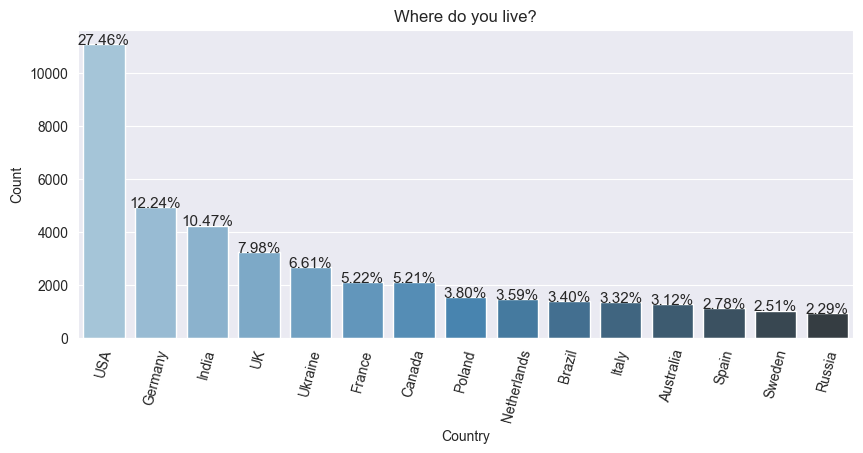

In [21]:
top_countries.loc[3, 'Country'] = 'UK'
top_countries.loc[0, 'Country'] = 'USA'
top_countries.loc[14, 'Country'] = 'Russia'
total_respondents = top_countries.Count.sum()
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title(schema_clean.loc['Country', 'question'])
plot = sns.barplot(x=top_countries.Country, y=top_countries.Count, palette='Blues_d' )
for bar in plot.patches:
    height = bar.get_height()
    plot.text(bar.get_x() + bar.get_width()/2, height, "{:.2f}%".format(height*100 / total_respondents), ha='center', size=11)
plt.show()

It appears that a disproportionately high number of respondents are from English speaking countries, probably because the survey is in English, and these countries have the high English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries (with Germany being an exception).

### Age

The distribution of respondents' age is another crucial factor to look at.
The data has age groups instead of singular value data.

In [22]:
age_groups = response_clean.Age.value_counts().reset_index()
age_groups.columns = ['Age', 'Count']
total_respondents = response_clean['Age'].count()

In [23]:
def plot_counts(df, y, x='Count', title=None, palette=None, order=None):
    # total_respondents = df.Count.sum()
    if y=='Language':
        total_respondents = response_clean['LanguageHaveWorkedWith'].count()
    else:
        total_respondents = response_clean[y].count()

    if order is not None:
        if isinstance(order, list):
            df = df.loc[order]
        elif isinstance(order, pd.Index):
            df = df.loc[order.to_list()]

    plot = sns.barplot(y=df[y], x=df[x], palette=palette)
    for bar in plot.patches:
        width = bar.get_width()
        if width > 0:
            plot.text(width + 0.1, bar.get_y() + bar.get_height() / 2, 
                    "{:.2f}%".format(width * 100 / total_respondents),
                    ha='left', va='center', size=11)
        else:
            plot.text(width - 0.15, bar.get_y() + bar.get_height() / 2, 
                    "{:.2f}%".format(width * 100 / total_respondents),
                    ha='right', va='center', size=11)

    plt.xticks()
    plt.title(title if title else schema_clean.loc[y, 'question'])
    plt.ylabel(y)
    plt.xlabel('Count')
    plt.show()


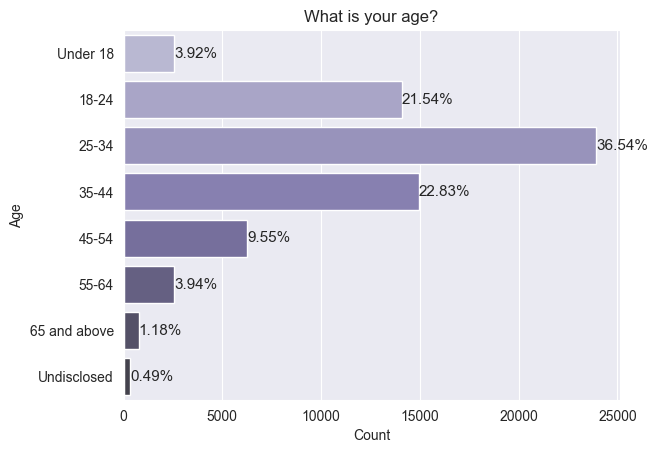

In [24]:
plot_counts(age_groups, 'Age', palette='Purples_d', order=[5, 2, 0, 1, 3, 4, 6, 7])

There is a large percentage of respondents in the 18-44 years old category (~80%). It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years and as a person in IT grows they switch to managerial positions and they no longer use websites like StackOverFlow on the regular and may not respond to surveys too.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer/developer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this.

In [25]:
edlevel = response_clean.EdLevel.value_counts().reset_index()
edlevel

,EdLevel,count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21937
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",13687
2,Some college/university study without earning ...,7651
3,"Secondary school (e.g. American high school, G...",5793
4,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",3005
5,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970
6,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",1870
7,"Associate degree (A.A., A.S., etc.)",1793
8,Primary/elementary school,1146
9,Something else,932


In [26]:
edlevel[edlevel['EdLevel']=='Bachelor’s degree (B.A., B.S., B.Eng., etc.)']

,EdLevel,count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21937


There seems to be duplicate Edlevel values due to difference in apostrophe character (' and ’). We'll correct the values and check counts again.

In [27]:
response_clean['EdLevel'] = response_clean['EdLevel'].replace("Bachelor’s degree (B.A., B.S., B.Eng., etc.)", "Bachelor's degree (B.A., B.S., B.Eng., etc.)")
response_clean['EdLevel'] = response_clean['EdLevel'].replace("Master’s degree (M.A., M.S., M.Eng., MBA, etc.)", "Master's degree (M.A., M.S., M.Eng., MBA, etc.)")

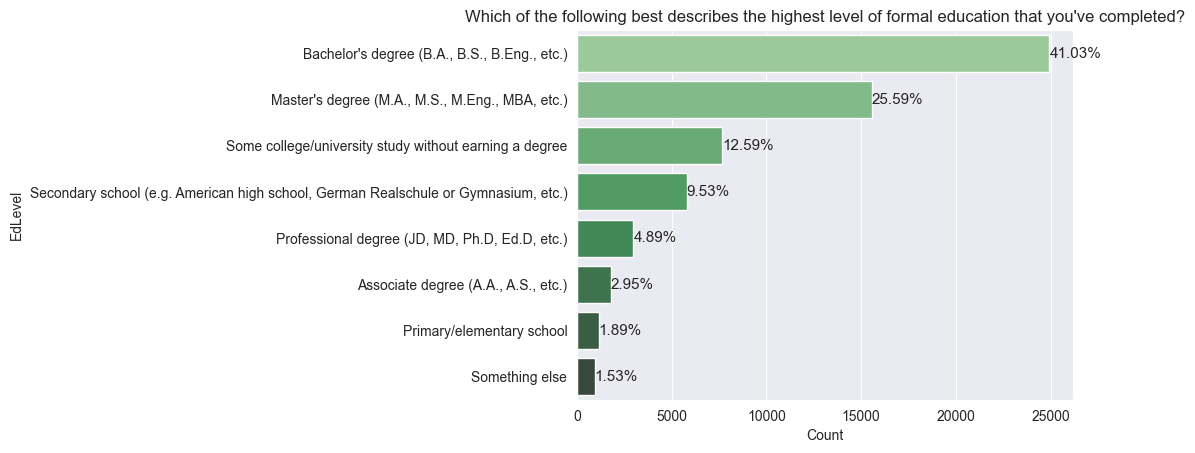

In [28]:
edlevel = response_clean.EdLevel.value_counts().reset_index()
edlevel.columns = ['EdLevel', 'Count']
plot_counts(edlevel, 'EdLevel', palette='Greens_d')

Unfortunately the survey doesn't account for the type of undergrad people attended, unlike in 2020 dataset, to comment on whether the kind of undergrad has any impact in the career choices of respondants. 

But from what we can visualize, there is a higher chance of being an active participant in programming and other IT related activities if the person has achieved a undergrad level of education or higher (~67%) and much more if a person just attended university education (~79%).

### Employment
Freelancing or contract work is a common choice among programmers/developers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [29]:
schema_clean.loc['Employment', 'question']

'Which of the following best describes your current employment status?'

In [30]:
response_clean.Employment.value_counts().reset_index()

,Employment,count
0,"Employed, full-time",39041
1,"Independent contractor, freelancer, or self-em...",4846
2,"Student, full-time",4709
3,"Employed, full-time;Independent contractor, fr...",3557
4,"Not employed, but looking for work",2341
...,...,...
105,"Employed, full-time;Student, full-time;Indepen...",1
106,"Employed, full-time;Independent contractor, fr...",1
107,"Employed, full-time;Independent contractor, fr...",1
108,"Student, full-time;Not employed, but looking f...",1


The `Employment` data seems to be a combination of many types. So we will split the types into separate columns and take a look from there.

Let's create a helper function to serve the purpose of splitting the data into singular value data by splitting at `;` character.

In [31]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    original_options = []
    for idx, value in col_series[col_series.notnull()].items(): # col_series.notnull() to not include null values
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                original_options.append(option)
                result_df[option] = False # all rows under option are False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[original_options]

In [32]:
total_respondents = response_clean.Employment.value_counts().sum()
employment = split_multicolumn(response_clean['Employment'])
employment

,"Employed, full-time","Student, full-time","Not employed, but looking for work","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Student, part-time","Employed, part-time",I prefer not to say,Retired
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
65432,True,False,False,False,False,False,False,False,False
65433,True,False,False,False,False,False,False,False,False
65434,True,False,False,False,False,False,False,False,False
65435,True,False,False,False,False,False,False,False,False


In [33]:
employment_counts = employment.sum().reset_index()
employment_counts.columns = ['Employment','Count']
total_respondents = response_clean.Employment.count()
employment_counts

,Employment,Count
0,"Employed, full-time",45162
1,"Student, full-time",8626
2,"Not employed, but looking for work",3954
3,"Independent contractor, freelancer, or self-em...",10726
4,"Not employed, and not looking for work",1203
5,"Student, part-time",2656
6,"Employed, part-time",4145
7,I prefer not to say,546
8,Retired,681


In [34]:
employment_counts.sort_values(by='Count', ascending=False).index.tolist()

[0, 3, 1, 6, 2, 5, 4, 8, 7]

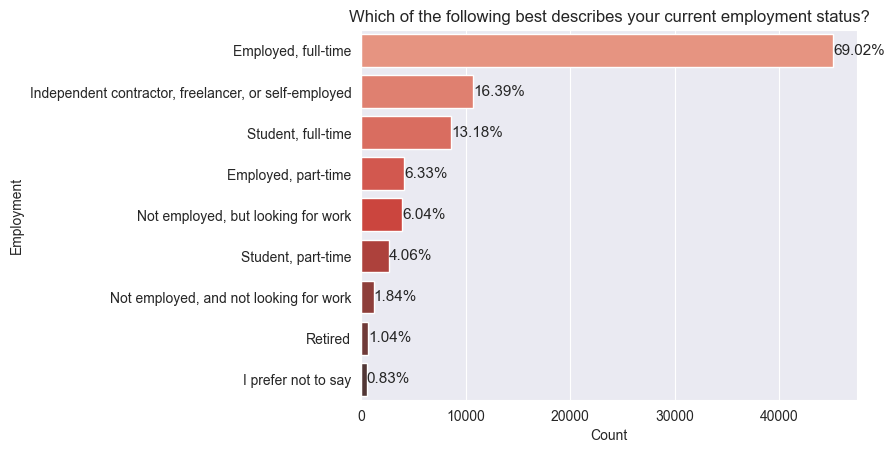

In [35]:
plot_counts(employment_counts, 
            'Employment', 
            palette='Reds_d', 
            order=employment_counts.sort_values(by='Count', ascending=False).index.tolist())

From the plot above we can observe that "Full-time" employment is overwhelmingly the most common status, which might reflect the target audience's demographics or the nature of the survey's respondents.

A substantial number of respondents work as freelancers or independent contractors, indicating a notable presence of non-traditional employment forms.

There is a significant representation of students, particularly full-time students, which may suggest that the StackOverFlow website is frequented by academic or educational professionals.

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [36]:
devtype = response_clean.DevType.value_counts().reset_index()
devtype.columns = ['DevType', 'Count']
total_respondents = response_clean.DevType.count()
devtype

,DevType,Count
0,"Developer, full-stack",18260
1,"Developer, back-end",9928
2,Student,5102
3,"Developer, front-end",3349
4,"Developer, desktop or enterprise applications",2493
5,Other (please specify):,2458
6,"Developer, mobile",2021
7,"Developer, embedded applications or devices",1623
8,Engineering manager,1275
9,Academic researcher,1238


We'll combine the devtypes that are less than 0.5% of the population.

In [37]:
def combine_to_others(df, y, threshold):
    total_respondents = df['Count'].sum()
    threshold_count = threshold * total_respondents /100
    df[y] = df[y].where(df['Count'] >= threshold_count, other='Others')
    df = df.groupby(y).agg({'Count': 'sum'}).reset_index()
    return df

In [38]:
devtype = combine_to_others(devtype, 'DevType', 0.5)
devtype

,DevType,Count
0,Academic researcher,1238
1,Cloud infrastructure engineer,634
2,Data engineer,1118
3,Data or business analyst,523
4,Data scientist or machine learning specialist,1024
5,DevOps specialist,1019
6,"Developer, AI",543
7,"Developer, QA or test",525
8,"Developer, back-end",9928
9,"Developer, desktop or enterprise applications",2493


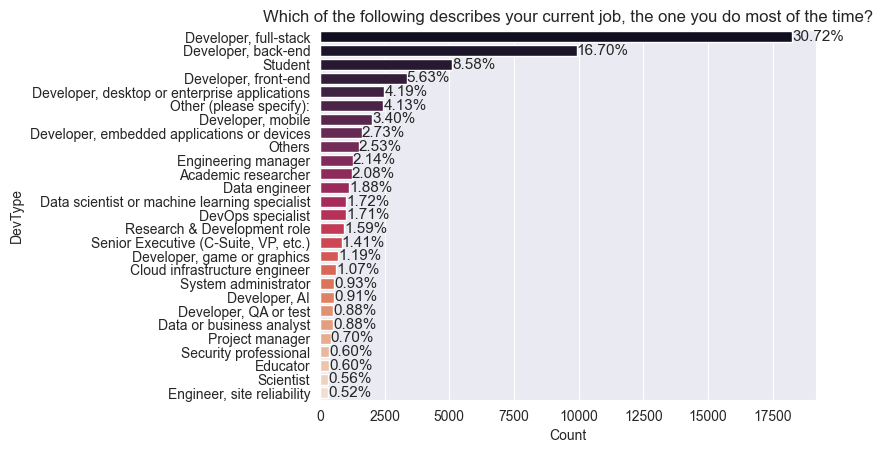

In [39]:
plot_counts(devtype, 
            'DevType', 
            palette='rocket', 
            order=devtype.sort_values(by='Count', ascending=False).index.tolist())

As one might expect, the most common roles include "Developer" in the name.

Senior Executive and Student reflect some managerial and educational roles, but students are more prevalent in this survey.

Surprisingly not many prominent data related roles are present except for Data Engineer though there is a significant boom in interest and hiring in the fields related to Data Science and AI. We can guess this has got something to do with the use of Generative AI where analysts can make better use of than developers for solving their problems.

The 'Others' category represents roles that were not specifically detailed or less common in the dataset, indicating a notable portion of respondents fall into various less-specific or unspecified roles.

The distribution shows a concentration in development roles, particularly full-stack development, with a significant number of respondents also identifying with specialized technical and managerial roles which is indicative of the type of resource websites like StackOverFlow intend to be.

The `RemoteWork` field contains information about the mode of work.

In [40]:
remotework = response_clean.RemoteWork.value_counts().reset_index()
remotework.columns = ['RemoteWork', 'Count']
remotework

,RemoteWork,Count
0,"Hybrid (some remote, some in-person)",23015
1,Remote,20831
2,In-person,10960


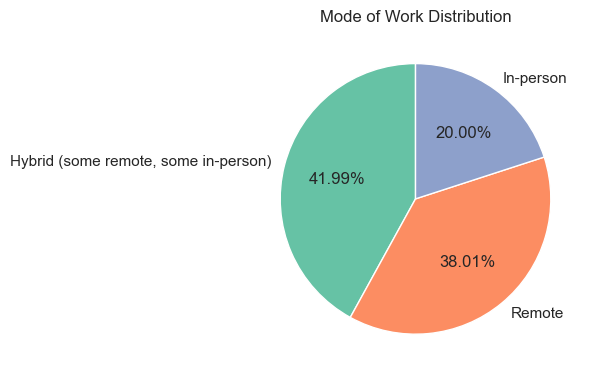

In [41]:
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
remotework.set_index('RemoteWork')['Count'].plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.ylabel('') 
plt.title('Mode of Work Distribution')
plt.tight_layout()
plt.show()

The hybrid and remote categories together account for a vast majority of respondents (~80%), indicating a strong preference for flexible or remote work arrangements.

The in-person work model seems to be diminishing in favor of more flexible arrangements, possibly due to changes in work culture, technological advancements, and responses to global events like the COVID-19 pandemic.

These insights highlight that remote and hybrid work setups are now a dominant trend, likely driven by the need for flexibility and improved work-life balance in various industries, particularly in tech.

The `Industry` field contains information about the industry the respondents work in.

In [42]:
industry = response_clean.Industry.value_counts().reset_index()
industry.columns = ['Industry', 'Count']
total_respondents = response_clean.Industry.count()
industry

,Industry,Count
0,Software Development,11918
1,Other:,3077
2,Fintech,1641
3,"Internet, Telecomm or Information Services",1629
4,Banking/Financial Services,1371
5,Healthcare,1277
6,Manufacturing,1265
7,Retail and Consumer Services,1264
8,Government,962
9,Media & Advertising Services,894


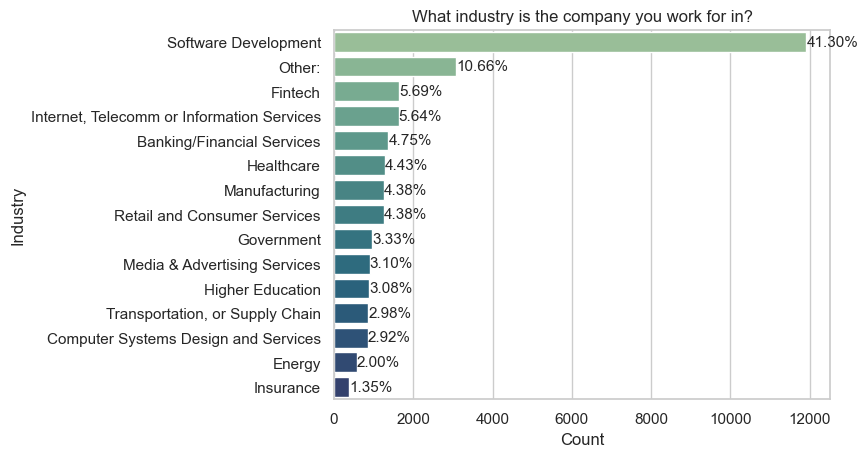

In [43]:
plot_counts(industry, 
            'Industry', 
            palette='crest', 
            order=industry.sort_values(by='Count', ascending=False).index.tolist())

Software Development dominates, emphasizing that this survey population is primarily tech-focused.

Fintech, Healthcare, and Internet/Telecom sectors highlight the growing intersection of technology with other industries.

Non-tech sectors like Retail, Manufacturing, E-Commerce, and Government show significant representation, underlining the broad application of technology and programming skills across various industries mostly for optimizations involving AI for targeted advertising/recommendations, precision manufacturing, anomoly detection, and workflow automations.

### Engagement
The `CodingActivities` column gives insight into the level of passion or professional commitment respondents have toward coding.

In [44]:
coding_activity = response_clean.CodingActivities.value_counts().reset_index()
total_respondents = coding_activity['count'].sum()
coding_activity

,CodingActivities,count
0,Hobby,9993
1,Hobby;Professional development or self-paced l...,6203
2,I don’t code outside of work,5874
3,Hobby;Contribute to open-source projects,3732
4,Professional development or self-paced learnin...,3120
...,...,...
114,Other (please specify):;School or academic wor...,1
115,Other (please specify):;School or academic wor...,1
116,Hobby;Contribute to open-source projects;Other...,1
117,Contribute to open-source projects;Other (plea...,1


In [45]:
total_respondents = response_clean.CodingActivities.value_counts().sum()
coding_activity = split_multicolumn(response_clean['CodingActivities'])
coding_activity_counts = coding_activity.sum().reset_index()
coding_activity_counts.columns = ['CodingActivities','Count']
coding_activity_counts

,CodingActivities,Count
0,Hobby,37226
1,Contribute to open-source projects,13717
2,Other (please specify):,1098
3,I don't code outside of work,634
4,Bootstrapping a business,8194
5,School or academic work,7069
6,Professional development or self-paced learnin...,21513
7,Freelance/contract work,10513
8,I don’t code outside of work,5874


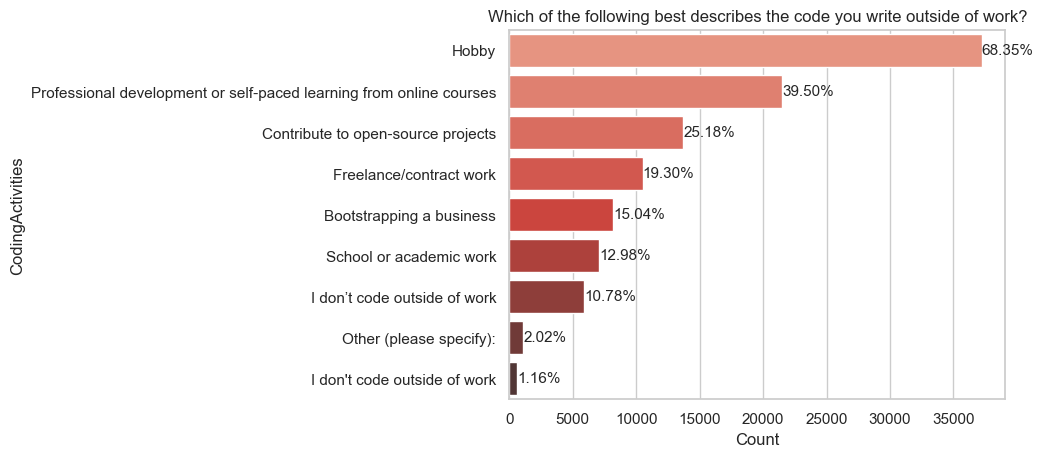

In [46]:
plot_counts(coding_activity_counts, 
            'CodingActivities', 
            palette='Reds_d', 
            order=coding_activity_counts.sort_values(by='Count', ascending=False).index.tolist())

The plot clearly indicates that the respondents are very passionate towards learning and programming (~40%) and a significant amount contibute to open-source projects as well (~25%).

There is a very huge population that code as a hobby (~68%), this also indicates that the respondents are very much invested in coding/programming as a skill worth sharpening on a regular basis.

There is also a significant number of responses that indicate the application of coding skills help in having multiple sources of income through Freelance/contract work (~19%) and/or business (~15%).

## Question-based Analysis

We've already gained several insights about the respondents by exploring individual columns of the dataset. Now, let's answer some questions.

### Q: What are the most popular programming languages in 2024? 

To answer, this we can use the `LanguageHaveWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [47]:
response_clean.LanguageHaveWorkedWith

0                                                      NaN
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [48]:
languages_worked_df = split_multicolumn(response_clean.LanguageHaveWorkedWith)
languages_worked_df

,Bash/Shell (all shells),Go,HTML/CSS,Java,JavaScript,Python,TypeScript,C#,C,C++,PHP,PowerShell,SQL,Lua,Rust,Swift,R,Ruby,Delphi,VBA,Visual Basic (.Net),F#,Clojure,Scala,Perl,MATLAB,OCaml,Assembly,Dart,Fortran,Julia,Crystal,Kotlin,Lisp,Prolog,Haskell,Ada,Elixir,Erlang,Groovy,Zig,GDScript,MicroPython,Objective-C,Cobol,Nim,Apex,Solidity,Zephyr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65435,False,True,False,False,False,True,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


It appears that a total of 49 languages were selected among the options provided in the survey. Let's aggregate these to identify the percentage of respondents who selected each language.

In [49]:
languages_worked = languages_worked_df.sum().reset_index()
languages_worked.columns = ['LanguageHaveWorkedWith', 'Count']
languages_worked

,LanguageHaveWorkedWith,Count
0,Bash/Shell (all shells),20412
1,Go,8103
2,HTML/CSS,31816
3,Java,18239
4,JavaScript,37492
5,Python,30719
6,TypeScript,23150
7,C#,16318
8,C,12184
9,C++,13827


There are too many programming languages listed so we'll combine the rare ones to 'Others' category. We can then plot the information using a horizontal bar chart.

In [50]:
languages_worked = combine_to_others(languages_worked, 'LanguageHaveWorkedWith', 0.5)
languages_worked

,LanguageHaveWorkedWith,Count
0,Assembly,3233
1,Bash/Shell (all shells),20412
2,C,12184
3,C#,16318
4,C++,13827
5,Dart,3594
6,Go,8103
7,Groovy,2004
8,HTML/CSS,31816
9,Java,18239


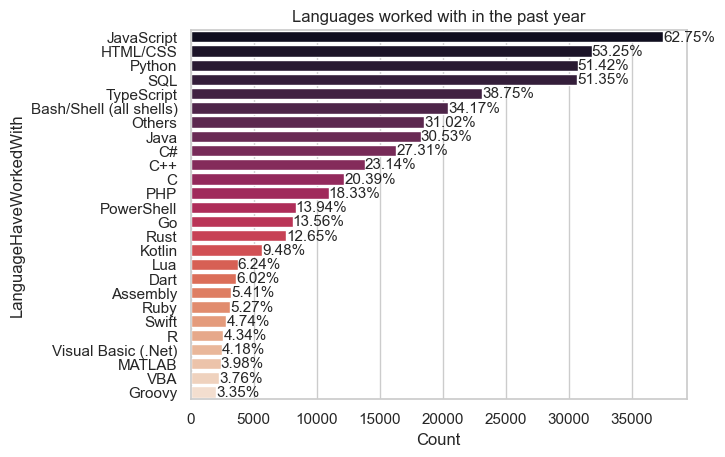

In [51]:
plot_counts(languages_worked, 
            'LanguageHaveWorkedWith', 
            palette='rocket', 
            order=languages_worked.sort_values(by='Count', ascending=False).index.tolist())

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills and are skills held by the Developer, full-stack which is a signifcant population of the respondents to this survey.

SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. 

Python seems to be the popular choice for many forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

Typescript is up there at the top because of its related usage with Javascript.

Bash/Shell scripting is high because of the boom in cloud-based architectures of many applications.

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageWantToWorkWith` column, with similar processing as the previous one.

In [52]:
languages_interested_df = split_multicolumn(response_clean.LanguageWantToWorkWith)
languages_interested = languages_interested_df.sum().reset_index()
languages_interested.columns = ['LanguageWantToWorkWith', 'Count']
languages_interested

,LanguageWantToWorkWith,Count
0,Bash/Shell (all shells),13744
1,Go,13837
2,HTML/CSS,20721
3,Java,10668
4,JavaScript,23774
5,Kotlin,7379
6,Python,25047
7,TypeScript,20239
8,C#,12921
9,PowerShell,4287


In [53]:
languages_interested = combine_to_others(languages_interested, 'LanguageWantToWorkWith', 0.5)

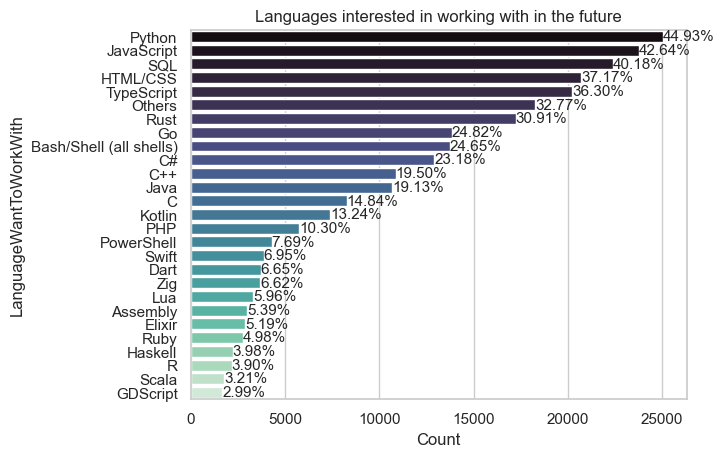

In [54]:
plot_counts(languages_interested, 
            'LanguageWantToWorkWith', 
            palette='mako', 
            order=languages_interested.sort_values(by='Count', ascending=False).index.tolist())

Once again, it's not surprising that Python is the language most people are interested in learning since it is an easy-to-learn general-purpose programming language well suited for a variety of domains like application development, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, which proves the inference!

And as expected web development and querying languages are towards the top, with a few backend languages like Rust and Go are on the rise.

The interest in shell scripting languages is increasing due to the a lot of work being done on cloud technologies.

#### Q:  What is the overall trend in usage of Languages?

This can be done by finding whether langauges that are currently being used are being continued (loved) or dropped (dreaded) for the next year.

In [55]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved = languages_loved_df.sum().reset_index()
languages_loved.columns = ['Language', 'Count']
languages_loved

,Language,Count
0,Ada,218
1,Apex,215
2,Assembly,1409
3,Bash/Shell (all shells),12776
4,C,5774
5,C#,10458
6,C++,7339
7,Clojure,504
8,Cobol,108
9,Crystal,120


In [56]:
languages_loved = combine_to_others(languages_loved, 'Language', 0.5)

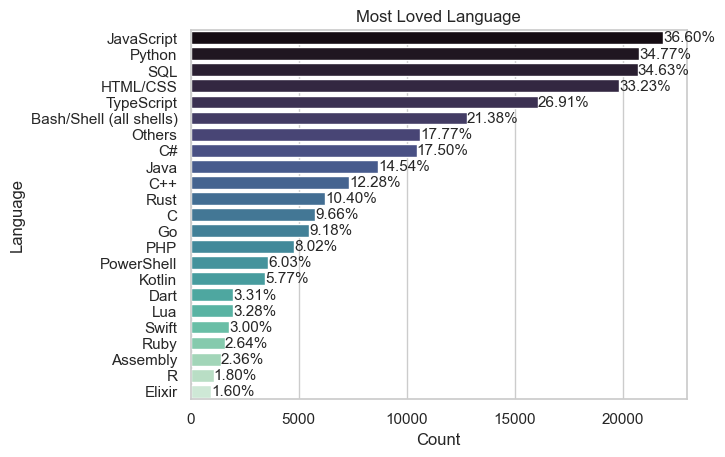

In [57]:
plot_counts(languages_loved, 
            'Language', 
            title='Most Loved Language',
            palette='mako', 
            order=languages_loved.sort_values(by='Count', ascending=False).index.tolist())

JavaScript is the most loved language maybe due to the new and improved frameworks like React, Svelte, Nest, Next, etc.

Python features second, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

And since SQL is very straight forward with its syntax people have a pleasant experience with it.

Overall, the top of the list of loved, current, and interested languages remain consistent with web development suite of languages, querying, and scripting languages with new backend languages like Rust, C# and Go.

Interestingly we can look at the list of most dreaded languages.

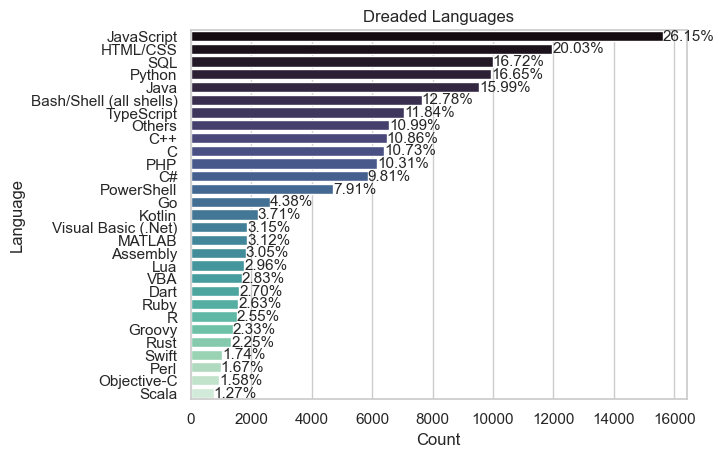

In [58]:
languages_dreaded_df = languages_worked_df & ~languages_interested_df
languages_dreaded = languages_dreaded_df.sum().reset_index()
languages_dreaded.columns = ['Language', 'Count']
languages_dreaded = combine_to_others(languages_dreaded, 'Language', 0.5)
plot_counts(languages_dreaded, 
            'Language', 
            title='Dreaded Languages', 
            palette='mako', 
            order=languages_dreaded.sort_values(by='Count', ascending=False).index.tolist())

Bjarne Stroustrup, the creator of C++, has said, "There are only two kinds of languages: the ones people complain about and the ones nobody uses". 

This seems very evident looking at the plot with the most loved languages are the most dreaded as well.

Let's see the overall trend on the views held by repspondent on programming languages.

In [59]:
overall = pd.merge(languages_loved, languages_dreaded, how='inner', on='Language')
overall.columns = ['Language', 'Count_loved', 'Count_dreaded']
overall['difference'] = overall['Count_loved'] - overall['Count_dreaded']
overall

,Language,Count_loved,Count_dreaded,difference
0,Assembly,1409,1824,-415
1,Bash/Shell (all shells),12776,7636,5140
2,C,5774,6410,-636
3,C#,10458,5860,4598
4,C++,7339,6488,851
5,Dart,1978,1616,362
6,Go,5485,2618,2867
7,HTML/CSS,19851,11965,7886
8,Java,8687,9552,-865
9,JavaScript,21869,15623,6246


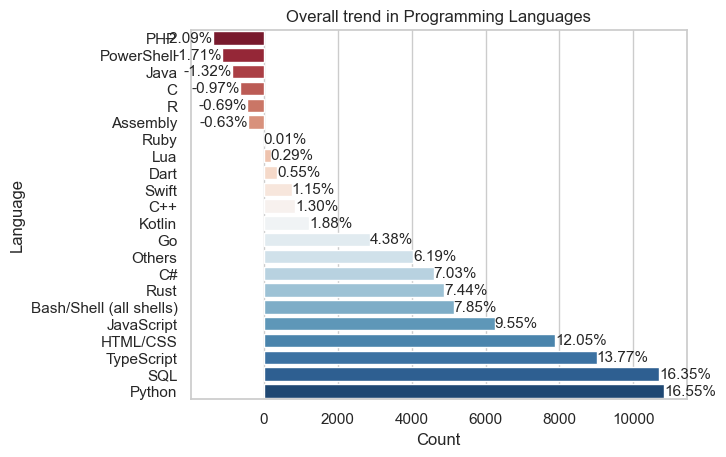

In [60]:
total_respondents = response_clean.shape[0]
overall = overall.loc[overall.sort_values(by='difference', ascending=True).index.tolist()]
plot = sns.barplot(y=overall['Language'], x=overall['difference'], palette='RdBu')
for bar in plot.patches:
    width = bar.get_width()
    if width > 0:
        plot.text(width + 0.1, bar.get_y() + bar.get_height() / 2, 
                    "{:.2f}%".format(width * 100 / total_respondents),
                    ha='left', va='center', size=11)
    else:
        plot.text(width - 0.15, bar.get_y() + bar.get_height() / 2, 
                    "{:.2f}%".format(width * 100 / total_respondents),
                    ha='right', va='center', size=11)

plt.xticks()
plt.title('Overall trend in Programming Languages')
plt.ylabel('Language')
plt.xlabel('Count')
plt.show()

Languages like Python, SQL, and JavaScript remain dominant and beloved by the developer community.

Rust, TypeScript, and Go are rising stars, showing high favorability.

Legacy languages like PHP, PowerShell, and Java face more mixed or negative perceptions, especially among newer developers.

C remains critical in certain domains but has a higher dread due to its complexity.

We can make similar analysis for other columns like database, platform, webframe, embedded, miscellaneous tech, and tools. 

### Q: How is the Job Satsfaction varying with respect to the Work Experience of the respondent?
For this we'll see the average points recorded by groups and observe the trend using statistical test.

In [23]:
workexp_jobsat = response_clean[['WorkExp', 'JobSat']]
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']

workexp_jobsat['WorkExpGroup'] = pd.cut(workexp_jobsat['WorkExp'], bins=bins, labels=labels, right=False)
grouped_workexp_jobsat = workexp_jobsat.groupby('WorkExpGroup')['JobSat'].agg(
    Average_Job_Satisfaction='mean',
    Std_deviation='std'
).reset_index()
grouped_workexp_jobsat.columns = ['WorkExpGroup', 'AvgJobSat', 'InGroupStdDev']
grouped_workexp_jobsat

,WorkExpGroup,AvgJobSat,InGroupStdDev
0,0-4,6.668925,2.134302
1,5-9,6.853073,2.061523
2,10-14,7.031006,2.051872
3,15-19,7.067761,2.038526
4,20-24,7.150977,2.066494
5,25-29,7.285074,1.969014
6,30-34,7.162963,2.177673
7,35-39,7.513274,1.917894
8,40-44,7.429577,2.119730
9,45-49,7.513514,2.028855


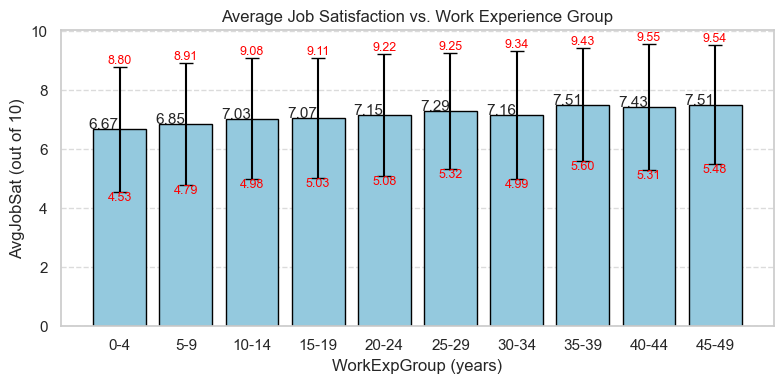

In [62]:
plt.figure(figsize=(8, 4))
plot = sns.barplot(data=grouped_workexp_jobsat, 
            x='WorkExpGroup', 
            y='AvgJobSat', 
            ci=None, color='skyblue', edgecolor='black', 
            errwidth=1, capsize=5, 
            estimator=lambda x: pd.Series(x).mean())

for i in range(len(grouped_workexp_jobsat)):
    plt.errorbar(x=i, 
                 y=grouped_workexp_jobsat['AvgJobSat'][i], 
                 yerr=grouped_workexp_jobsat['InGroupStdDev'][i],
                 capsize=5, 
                 color='black')
    
for bar in plot.patches:
    height = bar.get_height()
    plot.text(bar.get_x() + bar.get_width()/5, height, "{:.2f}".format(height), ha='center', size=11)
    varience = grouped_workexp_jobsat[grouped_workexp_jobsat['AvgJobSat'] == height]['InGroupStdDev'].values[0]
    upper_bound = height + varience
    lower_bound = height - varience
    plot.text(bar.get_x() + bar.get_width()/2, upper_bound, "{:.2f}".format(upper_bound), ha='center', size=9, va='bottom', color='red')
    plot.text(bar.get_x() + bar.get_width()/2, lower_bound, "{:.2f}".format(lower_bound), ha='center', size=9, va='top', color='red')

plt.xlabel('WorkExpGroup (years)')
plt.ylabel('AvgJobSat (out of 10)')
plt.title('Average Job Satisfaction vs. Work Experience Group')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Normally ANOVA test is used to compare the variances within and between groups but the data we are working with has discrete dependent variable. So we will go for Ordinal Logistic Regression, which is suitable when the dependent variable is ordinal and discrete.

In [25]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

workexp_jobsat['WorkExpGroup'] = workexp_jobsat['WorkExpGroup'].astype('category').cat.codes
workexp_jobsat['JobSat'] = pd.to_numeric(workexp_jobsat['JobSat'], errors='coerce')
workexp_jobsat.dropna(subset=['JobSat', 'WorkExpGroup'], inplace=True)

model = OrderedModel(workexp_jobsat['JobSat'], workexp_jobsat[['WorkExpGroup']], distr='logit')
ordinal_logit = model.fit()
print(ordinal_logit.summary())

                             OrderedModel Results                             
Dep. Variable:                 JobSat   Log-Likelihood:                -58904.
Model:                   OrderedModel   AIC:                         1.178e+05
Method:            Maximum Likelihood   BIC:                         1.179e+05
Date:                Fri, 20 Sep 2024                                         
Time:                        09:00:48                                         
No. Observations:               29126                                         
Df Residuals:                   29115                                         
Df Model:                           1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
WorkExpGroup     0.1027      0.006     18.388      0.000       0.092       0.114
0.0/1.0         -4.3436      0.058    -74.314 

c:\Users\dasar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


From the above model summary,

The correlation coefficient of WorkExpGroup is 0.1027, which means that, on average, as the work experience group increases, the likelihood of reporting a higher job satisfaction score increases. But the correlation is very weak.

The 95% confidence interval for WorkExpGroup is [0.092, 0.114], which suggests we are 95% confident that the true effect of work experience on job satisfaction lies between 0.092 and 0.114.

The z-value of 18.388 and a p-value of 0 suggest this effect is statistically significant and not likely due to random chance.

The thresholds (0.0/1.0 to 9.0/10.0) show the cutoff points between the job satisfaction levels. The thresholds are all negative, which suggests that a lot of people may report lower satisfaction scores, though the distribution varies across groups.

The model has a decent fit, though the Log-Likelihood and AIC values suggest there may still be room for improvement in the model.

Overall, there is a consistent upward trend in satisfaction with experience, reflecting perhaps a growing sense of job mastery, stability, and achievement in the workplace over time.

There is a slight dip in satisfaction between 30-34 years (7.16) and 40-44 years (7.43). However, this is followed by a slight rebound in the 45-49 years group.

### Q: What is the extent of AI penetration into development work, respondents' expectations, sentiments, complexity, and accuracy.

In [66]:
ai_df = response_clean[['AISelect','AISent','AIBen','AIAcc','AIComplex']].dropna(how='all')
ai_df

,AISelect,AISent,AIBen,AIAcc,AIComplex
0,Yes,Very favorable,Increase productivity,NaN,NaN
1,"No, and I don't plan to",NaN,NaN,NaN,NaN
2,"No, and I don't plan to",NaN,NaN,NaN,NaN
3,Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Bad at handling complex tasks
4,"No, and I don't plan to",NaN,NaN,NaN,NaN
...,...,...,...,...,...
65429,Yes,Favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,"Good, but not great at handling complex tasks"
65430,Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"Good, but not great at handling complex tasks"
65431,"No, but I plan to soon",Favorable,NaN,NaN,NaN
65432,Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Neither trust nor distrust,"Good, but not great at handling complex tasks"


#### AI currently used

In [67]:
ai_dev_process = ai_df['AISelect'].value_counts().reset_index()
ai_dev_process

,AISelect,count
0,Yes,37662
1,"No, and I don't plan to",14837
2,"No, but I plan to soon",8408


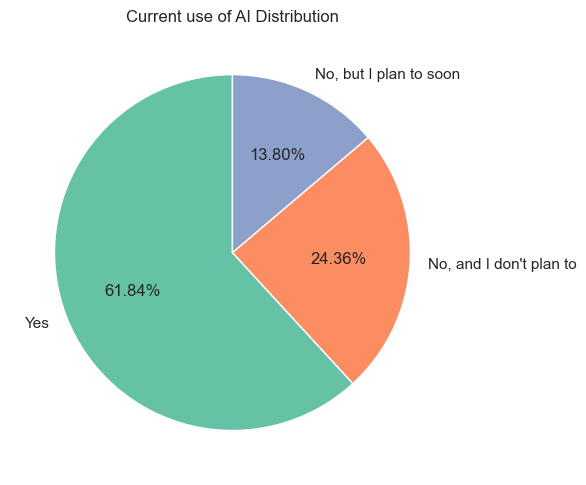

In [68]:
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")

ai_dev_process.set_index('AISelect')['count'].plot(
    kind='pie', 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2"),
    legend=False
)

plt.ylabel('')
plt.title('Current use of AI Distribution')
plt.tight_layout()
plt.show()

The above stats suggest that AI tools are widely adopted among developers, with ~62% already using them.

While ~24% remain uninterested or skeptical or have no use for them, there is still a notable ~14% of respondents who plan to adopt AI soon, showing that the trend toward AI usage in development is likely to continue growing.

#### Sentiment on AI

In [69]:
ai_sentiment = ai_df['AISent'].value_counts().reset_index()
ai_sentiment['percentage'] = (ai_sentiment['count'] / ai_sentiment['count'].sum() * 100).round(2)
ai_sentiment

,AISent,count,percentage
0,Favorable,22167,48.32
1,Very favorable,10848,23.65
2,Indifferent,8564,18.67
3,Unfavorable,2381,5.19
4,Unsure,1357,2.96
5,Very unfavorable,556,1.21


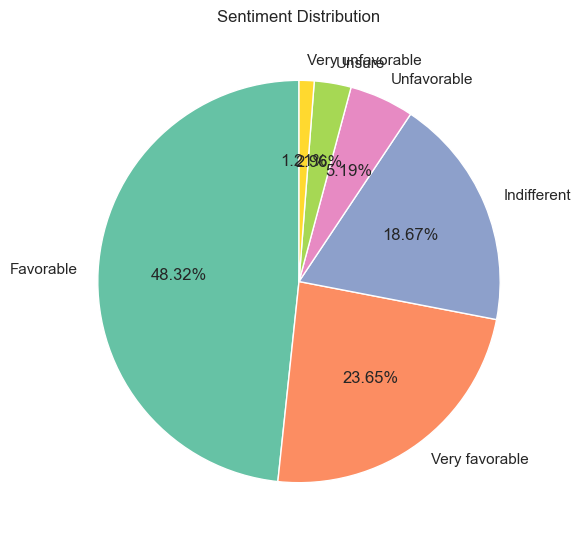

In [70]:
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
ai_sentiment.set_index('AISent')['count'].plot(
    kind='pie', 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2"),
    legend=False
)
plt.ylabel('')
plt.title('Sentiment Distribution')
plt.tight_layout()
plt.show()

A vast majority of developers (~72%) view AI tools in a positive light, indicating growing enthusiasm for integrating AI into their workflows.

Only a small percentage (6.4%) are opposed to the use of AI tools, suggesting that resistance to AI is limited.

A significant proportion (18.67%) remain indifferent, indicating room for increased engagement or understanding of AI tools.

#### Expected benefits of AI

In [71]:
ai_expectations_df = split_multicolumn(ai_df['AIBen'])
ai_expectations = ai_expectations_df.sum().reset_index()
ai_expectations.columns = ['AIBen','count']
ai_expectations

,AIBen,count
0,Increase productivity,29892
1,Greater efficiency,21586
2,Improve collaboration,2867
3,Speed up learning,23022
4,Improve accuracy in coding,11165
5,Make workload more manageable,9234
6,Other (please specify):,1839


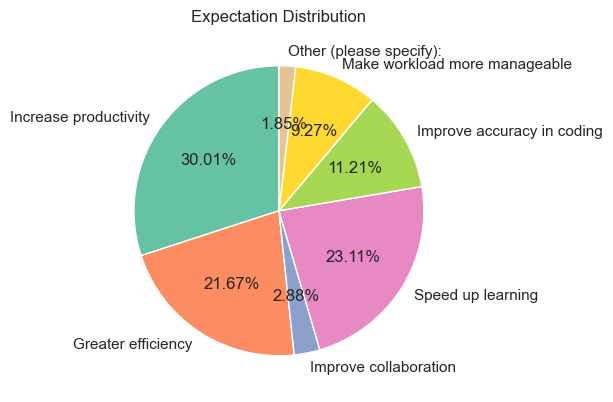

In [72]:
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
ai_expectations.set_index('AIBen')['count'].plot(
    kind='pie', 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2"),
    legend=False
)
plt.ylabel('')
plt.title('Expectation Distribution')
plt.tight_layout()
plt.show()

Increasing productivity and greater efficiency are the most expected benefits, indicating that developers prioritize AI tools for their ability to improve overall work output and performance.

Learning is also a significant benefit, as AI tools help to stay updated rapidly by summerizing the topics.

Accuracy and workload management are important but secondary concerns, while collaboration ranks relatively low among developer priorities.

#### View on Accuracy of AI

In [73]:
ai_acc = ai_df['AIAcc'].value_counts().reset_index()
ai_acc['percentage'] = (ai_acc['count'] / ai_acc['count'].sum() * 100).round(2)
ai_acc

,AIAcc,count,percentage
0,Somewhat trust,15039,40.32
1,Neither trust nor distrust,9920,26.59
2,Somewhat distrust,8395,22.51
3,Highly distrust,2932,7.86
4,Highly trust,1016,2.72


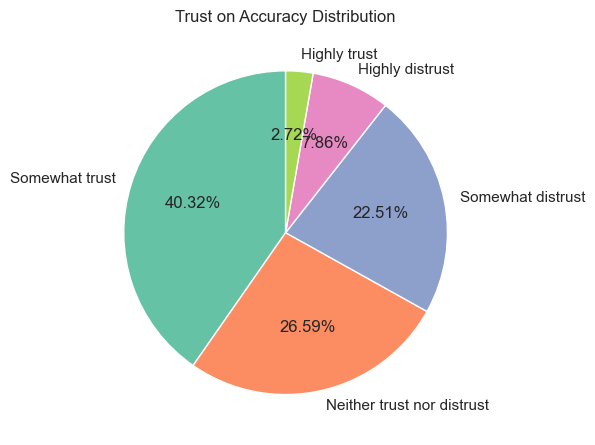

In [74]:
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
ai_acc.set_index('AIAcc')['count'].plot(
    kind='pie', 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2"),
    legend=False
)
plt.ylabel('')
plt.title('Trust on Accuracy Distribution')
plt.tight_layout()
plt.show()

While a majority of respondents (40.32%) show some trust in AI tools, only a very small minority (2.72%) highly trust AI tools. This indicates that trust in AI accuracy remains a concern, and most developers still approach AI with caution.

A combined 30.37% (those who somewhat or highly distrust) show significant distrust, highlighting that many developers are not yet fully confident in the reliability of AI in their workflows.

Indifference also plays a role, with over ~25% of respondents not feeling strongly either way, possibly indicating a lack of substantial experience with AI tools or uncertainty about their accuracy.

#### View on Ability to Solve Complex Problems

In [75]:
ai_complx = ai_df['AIComplex'].value_counts().reset_index()
ai_complx['percentage'] = (ai_complx['count'] / ai_complx['count'].sum() * 100).round(2)
ai_complx['AIComplex'] = ai_complx['AIComplex'].str.replace(' at handling complex tasks', '', regex=False)
ai_complx

,AIComplex,count,percentage
0,"Good, but not great",12102,32.69
1,Bad,11583,31.29
2,Neither good or bad,7706,20.82
3,Very poor,4415,11.93
4,Very well,1215,3.28


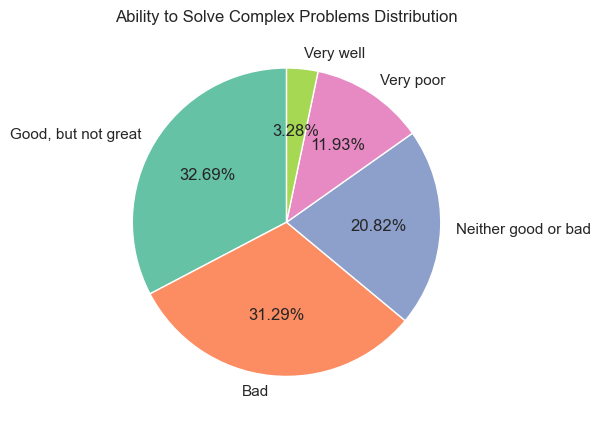

In [76]:
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
ai_complx.set_index('AIComplex')['count'].plot(
    kind='pie', 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2"),
    legend=False
)

plt.ylabel('')
plt.title('Ability to Solve Complex Problems Distribution')
plt.tight_layout()
plt.show()

Most users find AI tools either "good but not great" or "bad" at handling complex tasks, with around 64% of users divided between these two views.

Very few users (3.28%) consider AI tools to handle complex tasks exceptionally well, suggesting room for improvement in AI capabilities for more advanced tasks.

### Q: What are the ethical concerns held by respondents on AI?

In [77]:
ai_ethics = split_multicolumn(response_clean['AIEthics'])
ai_ethics = ai_ethics.sum().reset_index()
ai_ethics.columns = ['AIEthics','count']
ai_ethics['percentage'] = (ai_ethics['count'] / response_clean[response_clean['AIEthics'].notnull()].shape[0] * 100).round(2)
ai_ethics

,AIEthics,count,percentage
0,Circulating misinformation or disinformation,32933,79.26
1,Missing or incorrect attribution for sources o...,26836,64.59
2,Replacing jobs without options for new employm...,14174,34.11
3,Biased results that do not represent diverse v...,20766,49.98
4,Imitating a person's likeness,15675,37.73
5,Energy demand,14886,35.83
6,Other (please specify):,2659,6.40


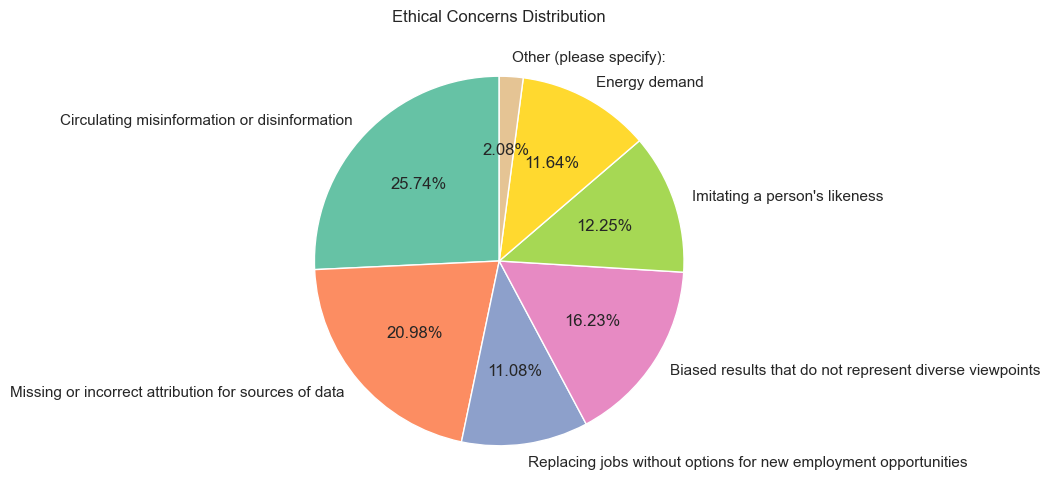

In [78]:
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
ai_ethics.set_index('AIEthics')['count'].plot(
    kind='pie', 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2"),
    legend=False
)
plt.ylabel('')
plt.title('Ethical Concerns Distribution')
plt.tight_layout()
plt.show()

The high percentages of "Circulating misinformation or disinformation" and "Missing or incorrect attribution for sources of data" can go hand-in-hand in spreading false information rapidly and widely, which can have significant societal impacts, such as influencing public opinion, undermining trust in institutions and AI-generated content not properly crediting original sources, which can lead to issues of plagiarism, loss of credibility, and difficulty in verifying information.

AI systems can perpetuate and even amplify existing biases if not properly managed is raised as a concern by ~50% of the respondents, leading to unfair treatment of certain groups or opinions and a lack of representation for diverse perspectives.

The concern of replacing jobs without alternatives highlights the fear that AI could automate jobs (~34%), leading to unemployment without providing adequate opportunities for retraining or new employment, affecting economic stability and livelihoods.

The ability of AI to mimic individuals raises ethical questions about consent, privacy, and the potential misuse of someone’s identity for malicious purposes (~38%).

The significant energy consumption required to train and run AI models is a growing concern, especially in the context of environmental sustainability and the carbon footprint of technology (~36%).

### Q: How does the trust in AI and threat vary with respect to other parameters like Industry, Age, and Role?

In [79]:
ai_threat = response_clean[['Age','AIThreat','Industry','DevType','Employment']]
ai_threat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         65437 non-null  object
 1   AIThreat    44689 non-null  object
 2   Industry    28858 non-null  object
 3   DevType     59445 non-null  object
 4   Employment  65437 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [80]:
ai_threat_age = ai_threat.groupby(['Age','AIThreat'])['AIThreat'].count().reset_index(name='count')
ai_threat_age.columns = ['Age','AIThreat','count']
ai_threat_age

,Age,AIThreat,count
0,18-24,I'm not sure,2272
1,18-24,No,6127
2,18-24,Yes,1258
3,25-34,I'm not sure,3197
4,25-34,No,11700
5,25-34,Yes,1950
6,35-44,I'm not sure,1965
7,35-44,No,7048
8,35-44,Yes,1232
9,45-54,I'm not sure,751


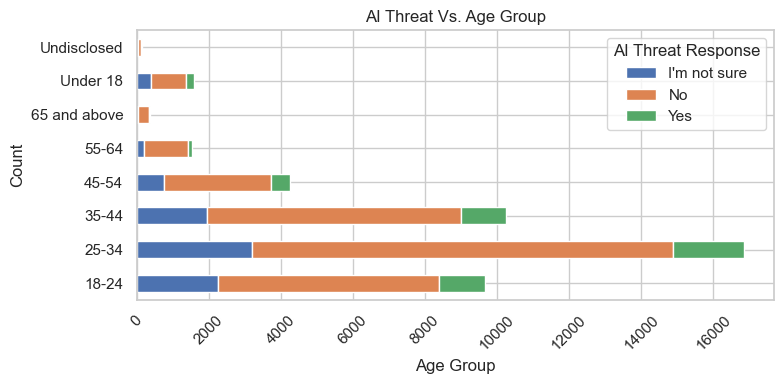

In [81]:
ai_threat_age = ai_threat_age.pivot_table(index='Age', columns='AIThreat', values='count', fill_value=0)

ai_threat_age.plot(kind='barh', stacked=True, figsize=(8, 4))
plt.title('AI Threat Vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='AI Threat Response')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot indicates that across all age groups, the majority do not perceive AI as a threat, although a noticeable portion remains uncertain. The trend is consistent across all age categories, with younger and middle-aged respondents showing a slightly higher level of uncertainty or concern compared to older respondents maybe because they have still got more years left till their retirement.

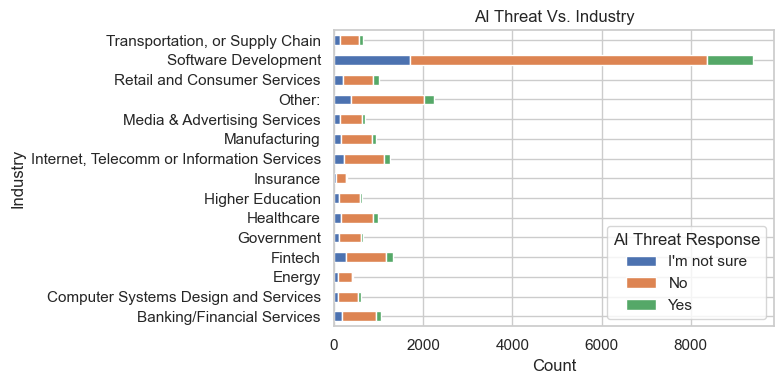

In [82]:
ai_threat_industry = ai_threat.groupby(['Industry','AIThreat'])['AIThreat'].count().reset_index(name='count')
ai_threat_industry.columns = ['Industry','AIThreat','count']
ai_threat_industry = ai_threat_industry.pivot_table(index='Industry', columns='AIThreat', values='count', fill_value=0)

ai_threat_industry.plot(kind='barh', stacked=True, figsize=(8, 4))
plt.title('AI Threat Vs. Industry')
plt.ylabel('Industry')
plt.xlabel('Count')
plt.legend(title='AI Threat Response')
plt.xticks()
plt.tight_layout()
plt.show()

Across most industries, the majority response is not a threat. However, uncertainty remains, particularly in the Fintech, Banking/Financial Services, Retail, Telecomm and Healthcare sectors, where a significant proportion of respondents are unsure about AI's impact. The Software Development industry shows the highest engagement in the survey, with a large number of respondents across all categories.

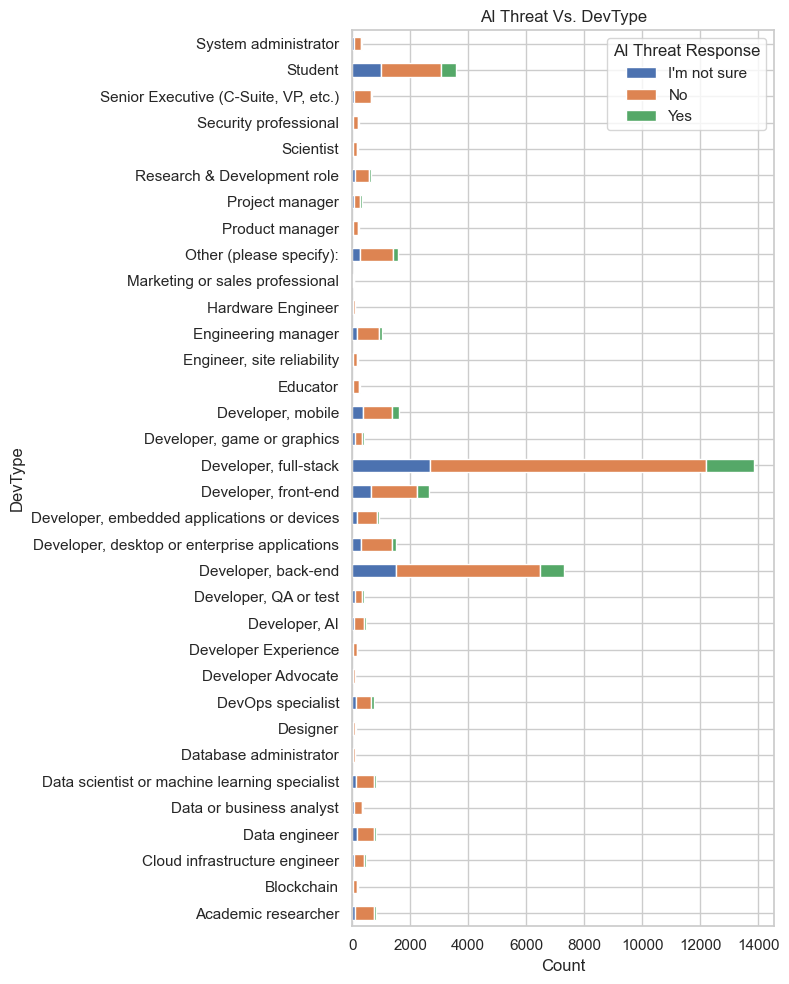

In [83]:
ai_threat_devtype = ai_threat.groupby(['DevType','AIThreat'])['AIThreat'].count().reset_index(name='count')
ai_threat_devtype.columns = ['DevType','AIThreat','count']
ai_threat_devtype = ai_threat_devtype.pivot_table(index='DevType', columns='AIThreat', values='count', fill_value=0)

ai_threat_devtype.plot(kind='barh', stacked=True, figsize=(8, 10))
plt.title('AI Threat Vs. DevType')
plt.ylabel('DevType')
plt.xlabel('Count')
plt.legend(title='AI Threat Response')
plt.xticks()
plt.tight_layout()
plt.show()

Overall, full-stack, front-end, backend, and mobile developers and students show the highest concern about AI as a threat, while database administrators, hardware engineers, blockchain, cloud, and other types of developers show the less concern in proportion.

### Q: What was the experience of filling the survey?

In [84]:
survey_exp = response_clean[['SurveyEase','SurveyLength']]

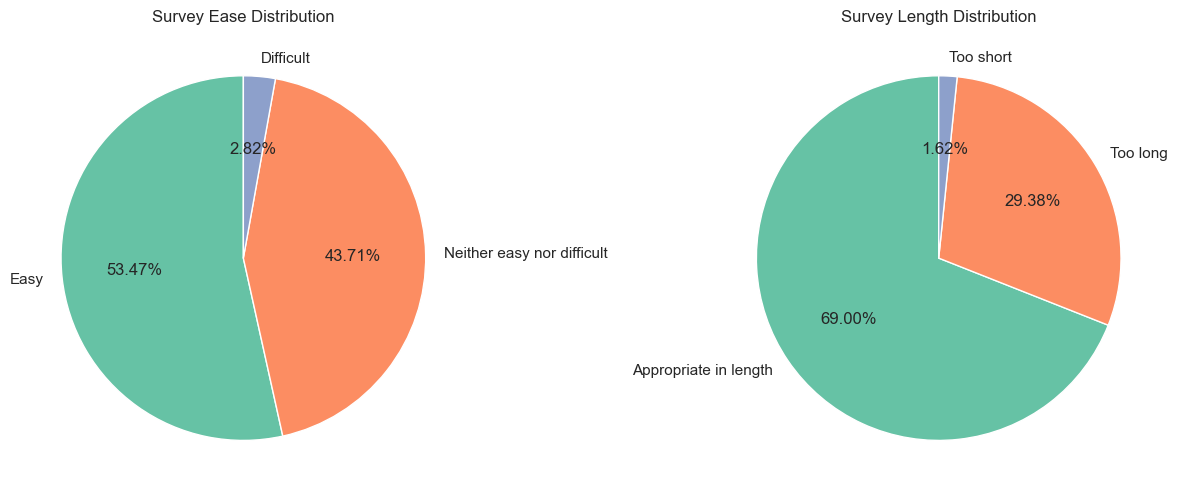

In [85]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

survey_ease = survey_exp['SurveyEase'].value_counts()
survey_ease.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set2"), ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('Survey Ease Distribution')

survey_length = survey_exp['SurveyLength'].value_counts()
survey_length.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set2"), ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Survey Length Distribution')

plt.tight_layout()
plt.show()

The majority of respondents found the survey easy and appropriately long, which is a positive sign of its usability.

There is room for improvement, particularly for those who felt the survey was too long or difficult, though these groups are in the minority, by reducing the length of the survey and setting better option selection methods.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries.

- A higher chance of being an active participant in programming and other IT related activities if the person has achieved a undergrad level of education or higher and much more if a person just attended university education.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2024, closely followed by SQL & Python.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.


## References and Future Work

Check out the following resources to learn more about the dataset and official analysis:

- Stack Overflow Survey Dataset: https://survey.stackoverflow.co/
- Stack Overflow Developer Survey: https://survey.stackoverflow.co/2024

As for future work, a lot more EDA can be done by taking multiple variables in combination.